Part I: Exploratory Data Analysis - Prosper Loan

Introduction

Each of the 113,937 loans in the Propser Loan Data Set has 81 variables, including the loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more. 

The dataset includes data on peer-to-peer loans made possible by the Prosper credit firm.

What influences the borrower's APR or interest rate? is the subject I'd be looking at in this dataset. 

It is well known that several parameters, including the borrower's credit score, debt-to-income ratio, employment history, income, loan term, and loan amount, are typically taken into account by credit companies when deciding the interest rates for loans to be issued to its borrowers. 

This information and others will form the basis of my investigation.


Wrangling

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pywaffle import Waffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('prosperLoanData.csv')
df

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
0                C    36               Completed  2009-08-14 00:00:00   
1              NaN    36                 Current                  NaN   
2               HR    36               Completed  2009-12-17 00:00:00   
3              NaN    36                 Current                  NaN   
4              NaN    36                 Current                  NaN   
...            ...   ...                     ...                  ...   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
0           0.16516        0.1580       0.1380  ...         -133.18   
1           0.12016        0.0920       0.0820  ...            0.00   
2           0.28269        0.2750       0.2400  ...          -24.20   
3           0.12528        0.0974       0.0874  ...         -108.01   
4           0.24614        0.2085       0.1985  ...          -60.27   
...             ...           ...          ...  ...             ...   
113932      0.22354        0.1864       0.1764  ...          -75.58   
113933      0.13220        0.1110       0.1010  ...          -30.05   
113934      0.23984        0.2150       0.2050  ...          -16.91   
113935      0.28408        0.2605       0.2505  ...         -235.05   
113936      0.13189        0.1039       0.0939  ...           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                     0.0                    0.0                  0.0   
1                     0.0                    0.0                  0.0   
2                     0.0                    0.0                  0.0   
3                     0.0                    0.0                  0.0   
4                     0.0                    0.0                  0.0   
...                   ...                    ...                  ...   
113932                0.0                    0.0                  0.0   
113933                0.0                    0.0                  0.0   
113934                0.0                    0.0                  0.0   
113935                0.0                    0.0                  0.0   
113936                0.0                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                                  0.0            1.0                0   
1                                  0.0            1.0                0   
2                                  0.0            1.0                0   
3                                  0.0            1.0                0   
4                                  0.0            1.0                0 

In [15]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [17]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

As stated earlier,this data has 81 variables which will be difficult to make us of. Hence, we will be selecting just a few(15) for this exploration.

VARIABLE SELECTION

We would be interested in the following columns/variables for this analysis

The variables that were selected and their descriptions are:

Term : The length of the loan expressed in months.

LoanStatus : The loan's current status: Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress.

PastDue: The delinquent bucket will appear alongside the PastDue status.

BorrowerAPR : The Borrower's Annual Percentage Rate (APR) for the loan.

ProsperScore : a unique risk score created from Prosper data in the past. The score is on a scale from 1 to 10, with 10 being the best or lowest risk. Loans that were started after July 2009 are eligible.

ListingCategory (numeric) : The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

EmploymentStatus : the borrower's work situation at the time they posted the ad.

EmploymentStatusDuration : The number of months that the job status had been in effect at the time the listing was made.

IsBorrowerHomeowner : If a borrower provides proof of homeownership or has a mortgage listed on their credit profile, they will be categorized as a homeowner.

DebtToIncomeRatio : The borrower's debt to income ratio at the time the credit report was pulled. If the debt to income ratio is not available, this value is Null. The maximum value for this variable is 10.01; any debt-to-income ratio that is more than 1000% will be represented by 1001%.

StatedMonthlyIncome : The monthly income the borrower stated at the time the listing was created.

LoanOriginalAmount : The origination amount of the loan.

LoanOriginationDate : The date the loan was originated.

MonthlyLoanPayment : The scheduled monthly loan payment

In [18]:
target_variables = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
                    'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount',
                    'LoanOriginationDate', 'MonthlyLoanPayment']

In [19]:
sub_df = df[target_variables]

In [20]:
sub_df.head()

Term LoanStatus  BorrowerAPR  ProsperScore  ListingCategory (numeric)  \
0    36  Completed      0.16516           NaN                          0   
1    36    Current      0.12016           7.0                          2   
2    36  Completed      0.28269           NaN                          0   
3    36    Current      0.12528           9.0                         16   
4    36    Current      0.24614           4.0                          2   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
0               0.17          3083.333333                9425   
1               0.18          6125.000000               10000   
2               0.06          2083.333333                3001   
3               0.15          2875.000000               10000   
4               0.26          9583.333333               15000   

   LoanOriginationDate  MonthlyLoanPayment  
0  2007-09-12 00:00:00              330.43  
1  2014-03-03 00:00:00              318.93  
2  2007-01-17 00:00:00              123.32  
3  2012-11-01 00:00:00              321.45  
4  2013-09-20 00:00:00              563.97

In [21]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   ProsperScore               84853 non-null   float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   EmploymentStatusDuration   106312 non-null  float64
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   DebtToIncomeRatio          105383 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  LoanOriginalAmount         113937 non-null  int64  
 11  LoanOriginationDate        113937 non-null  object 
 12  MonthlyLoanPayment         113937 non-null  float64
dtypes: bool(1), float64(6), int64

In [22]:
sub_df.describe()

Term    BorrowerAPR  ProsperScore  ListingCategory (numeric)  \
count  113937.000000  113912.000000  84853.000000              113937.000000   
mean       40.830248       0.218828      5.950067                   2.774209   
std        10.436212       0.080364      2.376501                   3.996797   
min        12.000000       0.006530      1.000000                   0.000000   
25%        36.000000       0.156290      4.000000                   1.000000   
50%        36.000000       0.209760      6.000000                   1.000000   
75%        36.000000       0.283810      8.000000                   3.000000   
max        60.000000       0.512290     11.000000                  20.000000   

       EmploymentStatusDuration  DebtToIncomeRatio  StatedMonthlyIncome  \
count             106312.000000      105383.000000         1.139370e+05   
mean                  96.071582           0.275947         5.608026e+03   
std                   94.480605           0.551759         7.478497e+03   
min                    0.000000           0.000000         0.000000e+00   
25%                   26.000000           0.140000         3.200333e+03   
50%                   67.000000           0.220000         4.666667e+03   
75%                  137.000000           0.320000         6.825000e+03   
max                  755.000000          10.010000         1.750003e+06   

       LoanOriginalAmount  MonthlyLoanPayment  
count        113937.00000       113937.000000  
mean           8337.01385          272.475783  
std            6245.80058          192.697812  
min            1000.00000            0.000000  
25%            4000.00000          131.620000  
50%            6500.00000          217.740000  
75%           12000.00000          371.580000  
max           35000.00000         2251.510000

DATA CLEANING

#rename column names to be easier to type

In [23]:
sub_df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

#Change the datatype of variables that are incorrectly assigned. #LoanOriginationDate should be datetime datatype

In [24]:
sub_df['LoanOriginationDate'] = pd.to_datetime(sub_df['LoanOriginationDate'])

#replace the missing values in ProsperScore with 0 to indicate 'Not available'

In [25]:
sub_df['ProsperScore'] = sub_df['ProsperScore'].fillna(0)

In [26]:
sub_df.head()

Term LoanStatus  BorrowerAPR  ProsperScore  ListingCategory  \
0    36  Completed      0.16516           0.0                0   
1    36    Current      0.12016           7.0                2   
2    36  Completed      0.28269           0.0                0   
3    36    Current      0.12528           9.0               16   
4    36    Current      0.24614           4.0                2   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
0               0.17          3083.333333                9425   
1               0.18          6125.000000               10000   
2               0.06          2083.333333                3001   
3               0.15          2875.000000               10000   
4               0.26          9583.333333               15000   

  LoanOriginationDate  MonthlyLoanPayment  
0          2007-09-12              330.43  
1          2014-03-03              318.93  
2          2007-01-17              123.32  
3          2012-11-01              321.45  
4          2013-09-20              563.97

In [27]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      113937 non-null  int64         
 1   LoanStatus                113937 non-null  object        
 2   BorrowerAPR               113912 non-null  float64       
 3   ProsperScore              113937 non-null  float64       
 4   ListingCategory           113937 non-null  int64         
 5   EmploymentStatus          111682 non-null  object        
 6   EmploymentStatusDuration  106312 non-null  float64       
 7   IsBorrowerHomeowner       113937 non-null  bool          
 8   DebtToIncomeRatio         105383 non-null  float64       
 9   StatedMonthlyIncome       113937 non-null  float64       
 10  LoanOriginalAmount        113937 non-null  int64         
 11  LoanOriginationDate       113937 non-null  datetime64[ns]
 12  Mo

#dealing with the missing values in BorrowerAPR by replacing the missing values with the mean of BorrowerAPR

In [29]:
sub_df['BorrowerAPR'] = sub_df['BorrowerAPR'].fillna(sub_df['BorrowerAPR'].mean())
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      113937 non-null  int64         
 1   LoanStatus                113937 non-null  object        
 2   BorrowerAPR               113937 non-null  float64       
 3   ProsperScore              113937 non-null  float64       
 4   ListingCategory           113937 non-null  int64         
 5   EmploymentStatus          111682 non-null  object        
 6   EmploymentStatusDuration  106312 non-null  float64       
 7   IsBorrowerHomeowner       113937 non-null  bool          
 8   DebtToIncomeRatio         105383 non-null  float64       
 9   StatedMonthlyIncome       113937 non-null  float64       
 10  LoanOriginalAmount        113937 non-null  int64         
 11  LoanOriginationDate       113937 non-null  datetime64[ns]
 12  Mo

WHAT IS THE STRUCTURE OF YOUR DATA SET?

With 81 variables, the Original Prosper dataset includes over 113k loans. 13 variables have been chosen by me for use in this  analysis.

WHAT IS/ARE THE MAIN FEATURES OF INTEREST IN YOUR DATASET?

BorrowerAPR Feature

In [ ]:
WHAT FEATURE IN THE DATASET DO YOU THINK WILL HELP SUPPORT YOUR INVESTIGATION INTO YOUR FEATURE OF INTEREST?

The features that will help support the investigation into the Borrowers APR are LoanOriginalAmount, MonthlyLoanPayment, DebtToOncomeRatio, EmploymentStatus, Term, LoanStatus. etc.

UNIVARIATE EXPLORATION!

Investigation into the distribution of individual variable starting with the main variable of interest then the supporting variables.


MAIN VARIABLE OF INTEREST IN THE BORROWERAPR

What is the distribution of the BorrowerAPR?

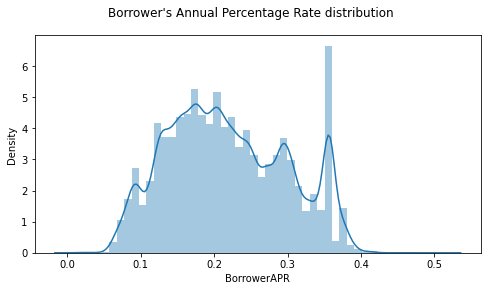

In [30]:
plt.figure(figsize=(8,4))
plt.suptitle("Borrower's Annual Percentage Rate distribution")
sb.distplot(sub_df['BorrowerAPR']);

OBSERVATION: The borrowers Annaul % rate is Multimodal

THE ORIGINAL AMOUNT OF LOAN.

What is the most frequently loaned amount?

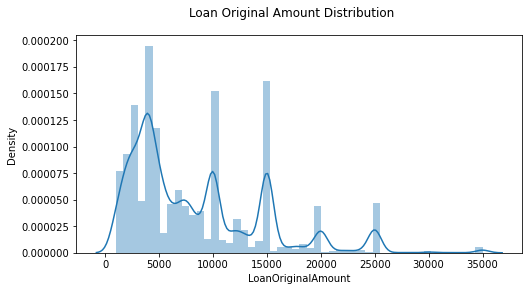

In [31]:
plt.figure(figsize=(8,4))
plt.suptitle("Loan Original Amount Distribution")
sb.distplot(sub_df['LoanOriginalAmount']);

In [32]:
sub_df.LoanOriginalAmount.value_counts().nlargest(5)

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
Name: LoanOriginalAmount, dtype: int64

ANSWER: The most frequently loaned money is $4,000

WHAT LOAN TERM DO MAJORITY OF THE LOANS FALL UNDER?

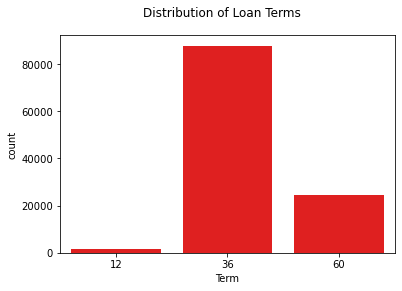

In [33]:
plt.suptitle("Distribution of Loan Terms")
sb.countplot(data = sub_df, x = 'Term', color = 'red');

ANSWER: The loan terms are divided into 3 loan terms of 12,36 and 60 months with 36 months being the most frequently used term.

LOAN STATUS OF ALL THE LOANS ON PROSPER CREDIT

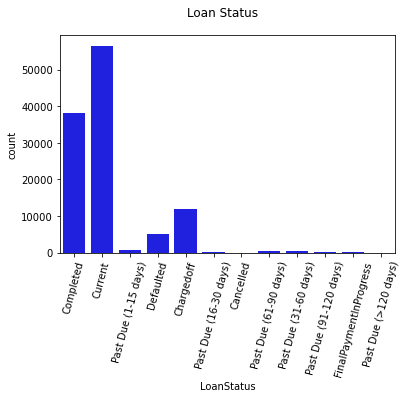

In [34]:
sb.countplot(data = sub_df, x = 'LoanStatus', color = 'blue');
plt.xticks(rotation = 75)
plt.suptitle("Loan Status");

In [36]:
cat = (sub_df['LoanStatus'] == 'Completed') | (sub_df['LoanStatus'] == 'Chargedoff') | (sub_df['LoanStatus'] == 'Defaulted')
sub_df = sub_df[cat]

def change(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
sub_df['LoanStatus'] = sub_df.apply(change, axis=1)
sub_df['LoanStatus'].value_counts()

Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

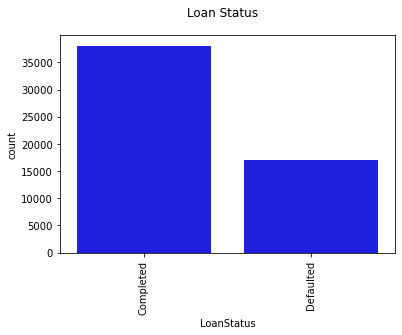

In [37]:
sb.countplot(data = sub_df, x = 'LoanStatus', color = 'blue');
plt.xticks(rotation = 90)
plt.suptitle("Loan Status");

ANSWER: The majority of the loans have current status, and a sizeable portion of them have already been paid off. According to the amount of days they have exceeded, the past-due loans are divided into six classes.

LISTING CATEGORY DISTRIBUTION OF LOANS

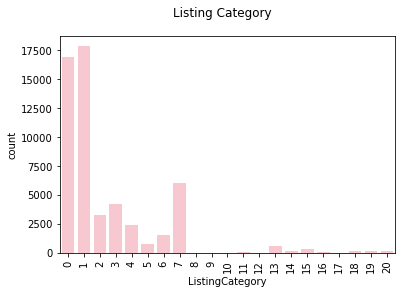

In [38]:
sb.countplot(data = sub_df, x = 'ListingCategory', color = 'pink');
plt.xticks(rotation = 90)
plt.suptitle("Listing Category");

EMPLOYMENT STATUS

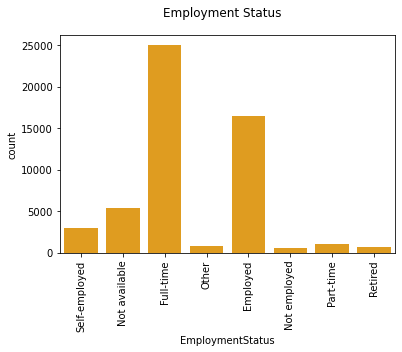

In [39]:
sb.countplot(data = sub_df, x = 'EmploymentStatus', color = 'orange');
plt.xticks(rotation = 90)
plt.suptitle("Employment Status");

Based on the above chart, we can see that most of our borrowers are fully employed.

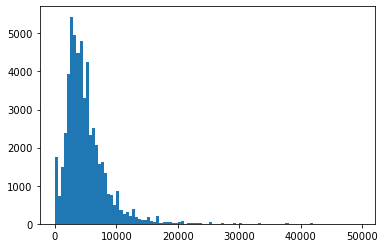

In [41]:
bins_smi = np.arange(0, 50000, 500)
plt.hist(data=sub_df, x='StatedMonthlyIncome', bins= bins_smi);

In [43]:
income_std = sub_df['StatedMonthlyIncome'].std()
income_mean = sub_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(sub_df[sub_df['StatedMonthlyIncome'] >= boundary])

343

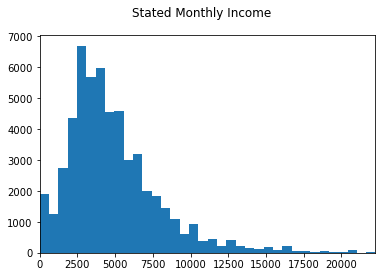

In [44]:
plt.hist(data=sub_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary)
plt.suptitle("Stated Monthly Income");

The monthly income of most borrowers hovers around 5000 with most less than 3000

DISCUSS THE DISTRIBUTION OF YOUR VARIABLE OF INTEREST. WERE THEY ANY UNUSUAL POINTS?DID YOU NEED TO PERFORM ANY TRANSFORMATIONS?

My variable (Borrowers) annual percentage rate distribution is MULTIMODAL

OF THE FEATURES YOU INVESTIGATED, WERE THERE ANY UNUSUAL DISTRIBUTION? DID YOU PERFORM ANY OPERATIONS
ON THE DATA TO TIDY, ADJUST OR CHANGE THE FORM OF THE DATA? IF SO, WHY DID YOU DO SO?

Most loan amounts have a right skew with numerous distinct peaks. The most common loan size is $4,000. 

Three loan terms—12 months, 26 months, and 60 months—are available, with 36 months being the most popular as stated earlier.

The majority of the loans are now in current status, and a sizeable portion of them have already been paid off. 

The past-due debts are divided into six groups based on how many days have passed since their due date. 

Debt consolidation is the loan category that receives the most requests. 

The monthly income distribution is right-skewed. With the majority of borrowers reporting monthly incomes of less than $30,000, approximately 5,000 seems to be the most common amount

BIVARIATE EXPLORATION (Correlation plot between all the variables)

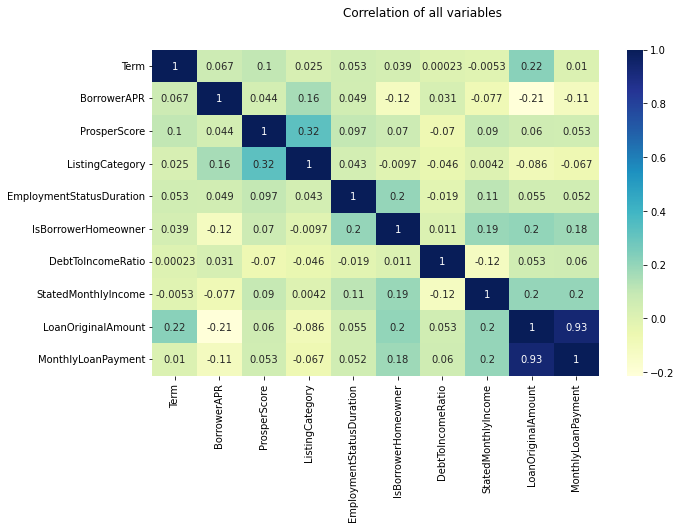

In [46]:
plt.figure(figsize = [10, 6])
sb.heatmap(sub_df.corr(), cmap="YlGnBu", annot=True)
plt.suptitle("Correlation of all variables");

EXPLORING FURTHER INTO THE VARIABLES

TERM VS LOANORIGINAL AMOUNT

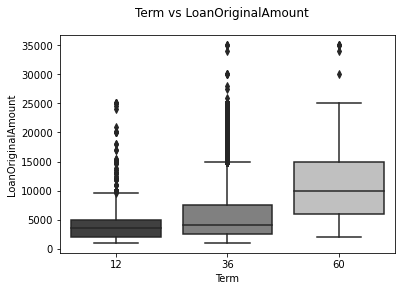

In [49]:
sb.boxplot(x='Term',y='LoanOriginalAmount',data=sub_df,palette='gray')
plt.suptitle("Term vs LoanOriginalAmount");

From the above: The loan amount is directly proportional to the term status given for loan repayment

EMPLOYMENT STATUS DURATION VS ISBORROWED HOME OWNER (How does a homeowner and a non home owner compare in terms of duration of their employment)

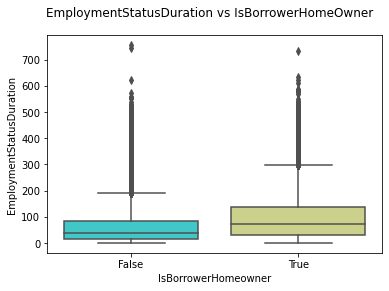

In [58]:
sb.boxplot(x="IsBorrowerHomeowner", y="EmploymentStatusDuration", data=sub_df,palette='rainbow')
plt.suptitle("EmploymentStatusDuration vs IsBorrowerHomeOwner");

borrowers that own homes have more employment history than their non home ownwers

ISBORROWER HOMEOWNER VS LOAN ORIGINAL AMOUNT

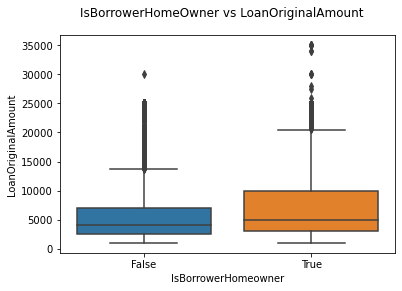

In [59]:
sb.boxplot(x="IsBorrowerHomeowner", y="LoanOriginalAmount", data=sub_df)
plt.suptitle("IsBorrowerHomeOwner vs LoanOriginalAmount");

The above demonstrates that non-homeowners primarily borrowed amounts between $0 and $5,000 with a maximum of $30,000. 
Even though the majority of homeowners ranged in income from $5,000 and upwards,

In [ ]:
LOAN ORIGINAL AMOUNT VS MONTHLY LOAN PAYMENT

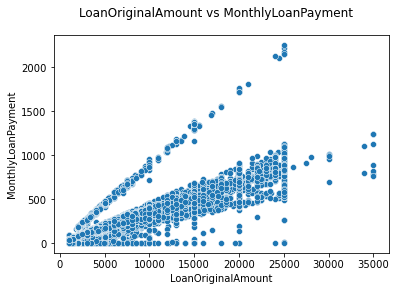

In [61]:
sb.scatterplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', data = sub_df)
plt.suptitle("LoanOriginalAmount vs MonthlyLoanPayment");

The loan amount is also directly proportional to the monthly repayment amount

TALK ABOUT SOME OF THE RELATIONSHIPS YOU OBSERVED IN THIS PART OF INVESTIGATION HOW DID THE FEATURE OF INTEREST VARY WITH OTHER FEATIRES IN THE DATASET?

The loan amount is directly proportional to the term status given for loan repayment.

Borrowers that own homes have more employment history than their non home ownwers.

Also, non-homeowners primarily borrowed amounts between $0 and $5,000 with a maximum of $30,000. 
Even though the majority of homeowners ranged in income from $5,000 and upwards,

DID YOU OBSERVE ANY INTERESTING RELATIONSHIPS BETWEEN THE OTHER FEATURES(NOT THE MAIN FEATURE OF INTEREST)?

Home owner borrowers have longer job histories than non home onwers, and non-owners often received loans in the range of $0 to $5,000 with a maximum of $30,000. While the majority of homeowners were dispersed among various quantities between 5000 and above.

MULTIVARIATE EXPLORATION (Term Vs LoanoriginalAmount Vs BorrowerAPR

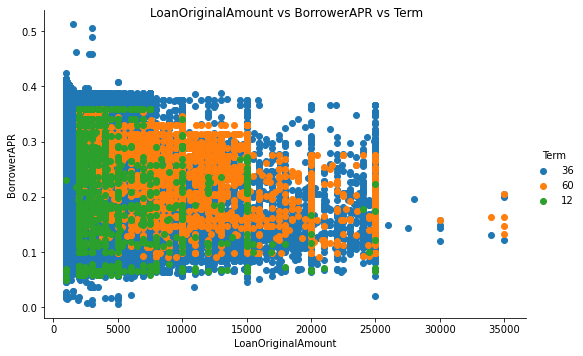

In [65]:
g = sb.FacetGrid(data = sub_df, hue = 'Term',hue_order = [36, 60, 12], size = 5, aspect = 1.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend()
plt.suptitle("LoanOriginalAmount vs BorrowerAPR vs Term");

TALK ABOUT SOME OF THE RELATIONSHIP YOU OBSERVED IN THIS PART OF THE INVESTIGATION. 
WERE THERE FEATURES THAT STRENGTHENED EACH OTHER IN TERMS OF LOOKING AT YOUR FEATURES OF INTEREST?

Loans for a 60-month duration are concentrated more on higher loan amounts and have borrowers' annual rate percentages between 0.1 and 0.35.

The 36 months term loans have borrowers annual rate percentage between 0 - 0.4 with a few outliers going to 0.5.

whereas loans for a 12-month term are primarily for low loan amounts and have borrowers' annual rate percentages between 0 and 0.35.

The above observation also answers the question : Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?